In [20]:
#importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Import silhouette_score


import warnings
warnings.filterwarnings('ignore')

In [21]:
#loading the dataset

df =  pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
#checcking the null values in the dataset

df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [24]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<h2>1.Load and visualize dataset (optional PCA for 2D view).</h2>


In [25]:
#Select numerical features for PCA

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

In [26]:
#standardize the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
#Applying PCA to reduce to 2 dimensions

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

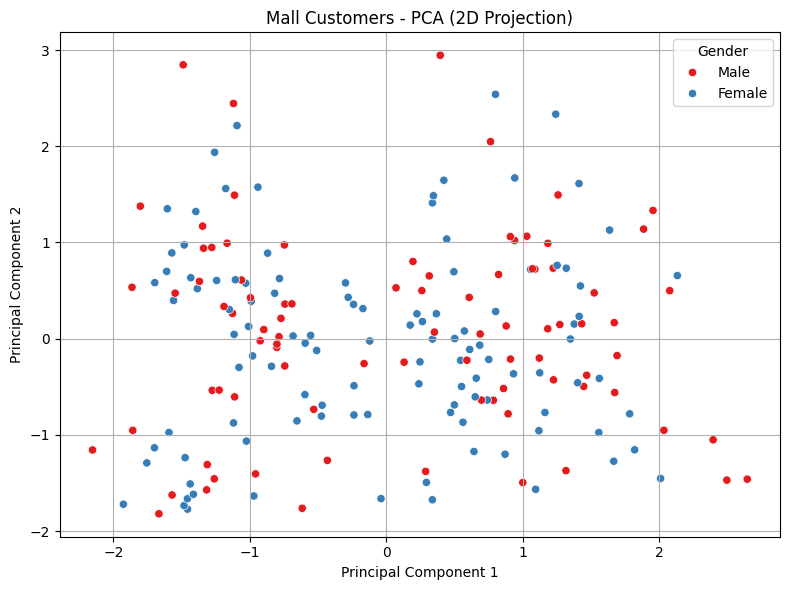

In [28]:
#Create a scatterplot

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Gender'], palette='Set1')
plt.title('Mall Customers - PCA (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()

<h2> 2.Fit K-Means and assign cluster labels.</h2>

In [29]:
# Apply KMeans with a specified number of clusters (e.g., 5)

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the first few rows with the new cluster labels
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  


<h2>3.Use the Elbow Method to find optimal K.</h2>


Inertia for K=1: 599.9999999999999
Inertia for K=2: 389.38618895643714
Inertia for K=3: 295.4562449213557
Inertia for K=4: 205.22514747675913
Inertia for K=5: 169.89149793438568
Inertia for K=6: 134.35277477401493
Inertia for K=7: 121.38935022502866
Inertia for K=8: 113.72723000071333
Inertia for K=9: 102.13623844329251
Inertia for K=10: 92.55027231838784


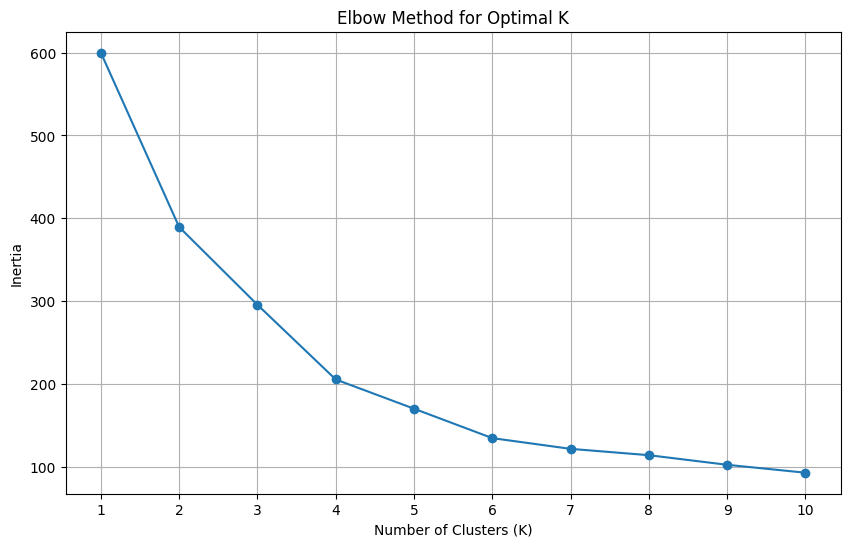

In [30]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []

# Try different values of k from 1 to 10 (or a reasonable range)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    print(f"Inertia for K={k}: {inertia[-1]}")


# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# The elbow point in the plot represents the optimal number of clusters.
# Visually inspect the graph to identify where the rate of decrease in inertia slows down significantly.
# Based on the plot, choose the K value at the elbow.

<h2>4.Visualize clusters with color-coding.</h2>

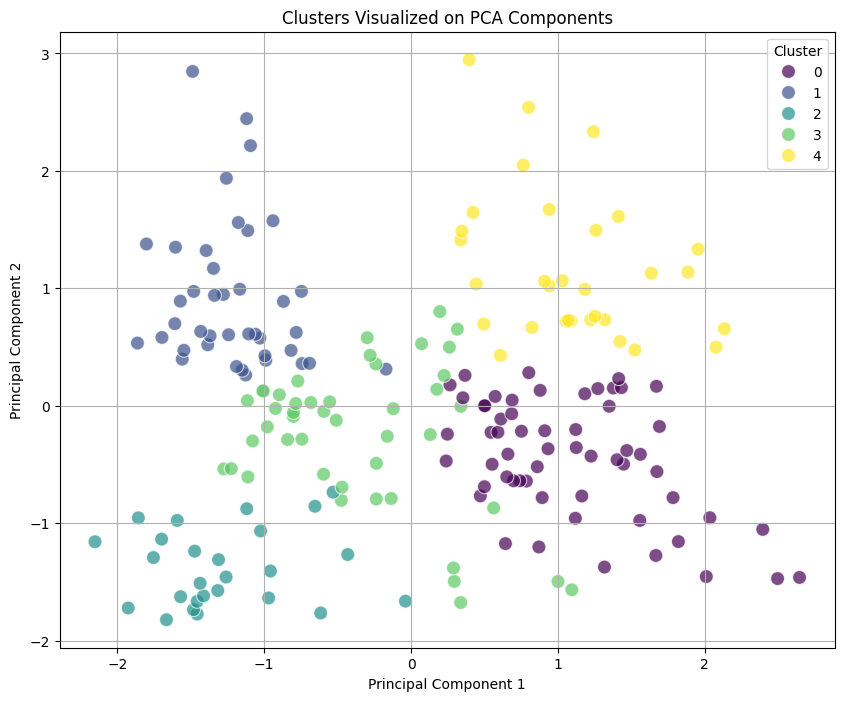

In [31]:
# Add the cluster labels to the PCA result
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['Cluster'] = df['Cluster']

# Visualize the clusters with color-coding
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=X_pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters Visualized on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

<h2>5.Evaluate clustering using Silhouette Score.</h2>

In [32]:
# Calculate the silhouette score
# Make sure you have the cluster labels from your KMeans model (e.g., stored in df['Cluster'])
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])


print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.40846873777345605


In [33]:
# To plot silhouette scores for different numbers of clusters:
silhouette_scores = []
for k in range(2, 11):  # Silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for K={k}: {silhouette_avg}")


Silhouette Score for K=2: 0.33547192894004574
Silhouette Score for K=3: 0.3579234303882264
Silhouette Score for K=4: 0.4039582785148566
Silhouette Score for K=5: 0.40846873777345605
Silhouette Score for K=6: 0.43106526216603014
Silhouette Score for K=7: 0.410091114520974
Silhouette Score for K=8: 0.3673663165322295
Silhouette Score for K=9: 0.37442148555078425
Silhouette Score for K=10: 0.36186970479722974


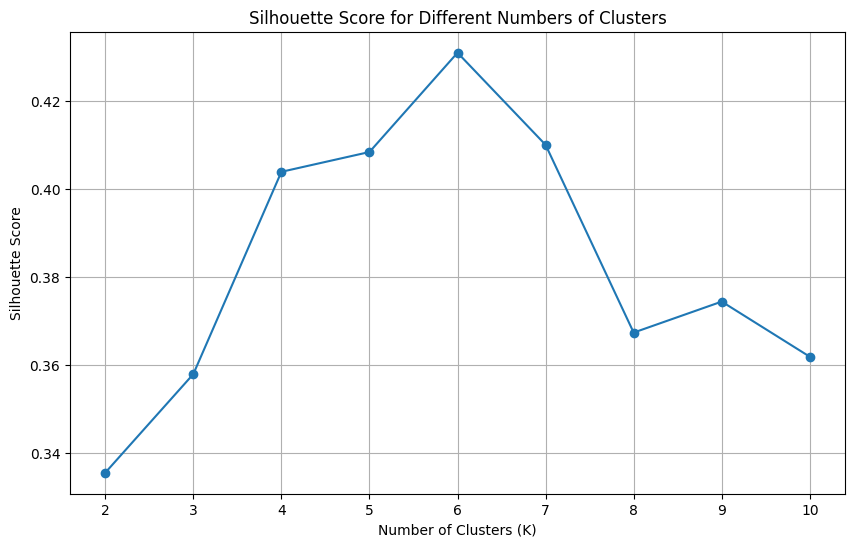

In [34]:
# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()